In [1]:
import pandas as pd
import json
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [7]:
with open('task1.json') as json_file:
    data = json.load(json_file)

A = []
for dataset in data:
    for column in dataset['columns']:
        temp = []
        for data_type in column['data_types']:
            temp.append(data_type['type'])
        A.append(temp)

te = TransactionEncoder()
te_ary = te.fit(A).transform(A)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True).sort_values(by=['support'], ascending=False)
frequent_itemsets = frequent_itemsets.reset_index(drop=True)
frequent_itemsets

,support,itemsets
0,0.521658,(INTEGER)
1,0.506755,(TEXT)
2,0.163723,(REAL)
3,0.140598,"(INTEGER, TEXT)"
4,0.093892,"(INTEGER, REAL)"
5,0.037091,"(REAL, TEXT)"
6,0.033043,(DATE/TIME)
7,0.019507,"(INTEGER, REAL, TEXT)"


In [8]:
import collections
import matplotlib.pyplot as plt

In [9]:
type_cnt = collections.Counter()
with open('task1.json') as json_file:
    data = json.load(json_file)
    for dataset in data:
        for column in dataset['columns']:
            for datatype in column['data_types']:
                type = datatype['type']
                type_cnt[type] += 1

print(type_cnt)

Counter({'INTEGER': 20618, 'TEXT': 20029, 'REAL': 6471, 'DATE/TIME': 1306})


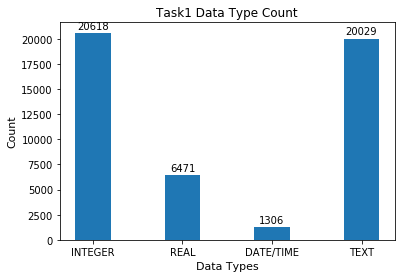

In [10]:
xs = ['INTEGER', 'REAL', 'DATE/TIME', 'TEXT']
ys = [20618, 6471, 1306, 20029]
plt.bar(xs, ys, width=0.4)
plt.title('Task1 Data Type Count')
plt.xlabel('Data Types', fontsize=11)
plt.ylabel('Count', fontsize=11)
for x, y in zip(xs, ys):
    plt.annotate(y,
                 (x, y),
                 textcoords='offset points',
                 xytext=(0,4),
                 ha='center')
plt.show()